<p><h1><font color = DarkBlue> Heart Disease Case Study </font></h1></p>

In [1]:
# importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix, classification_report,roc_auc_score

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


<p><h3><font color =Blue> Reading the Dataset </font></h3></p>

In [2]:
heart_data = pd.read_csv("http://storage.googleapis.com/dimensionless/ML_with_Python/Chapter%205/heart.csv")

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<p><h3><font color = darkBlue> Dataset Description </font></h3></p>
<ul><li><b>age:</b> age in years</li>
<li><b>sex:</b> sex (1 = male; 0 = female)</li>
<li><b> cp:</b> chest pain type</li>
<ul><li><b> Value 1:</b> typical angina</li>
<li><b> Value 2:</b> atypical angina</li>
<li><b> Value 3:</b> non-anginal pain</li>
    <li><b> Value 4:</b> asymptomatic </li></ul>
<li><b>trestbps:</b> resting blood pressure (in mm Hg on admission to the hospital)</li>
<li><b>chol:</b> serum cholestoral in mg/dl</li>
<li><b>fbs:</b> (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)</li>
<li><b>restecg:</b> resting electrocardiographic results</li>
<ul><li><b> Value 0:</b> normal</li>
<li><b> Value 1:</b> having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)</li>
    <li><b> Value 2:</b> showing probable or definite left ventricular hypertrophy by Estes' criteria</li></ul>
<li><b>thalach:</b> maximum heart rate achieved</li>
<li><b>exang:</b> exercise induced angina (1 = yes; 0 = no)</li>
<li><b>oldpeak :</b> ST depression induced by exercise relative to rest</li>
<li><b>slope:</b> the slope of the peak exercise ST segment</li>
<li><b>ca:</b> number of major vessels (0-3) colored by flourosopy</li>
<li><b>thal: </b>3 = normal; 6 = fixed defect; 7 = reversable defect</li>
<li><b>target:</b> diagnosis of heart disease (angiographic disease status)</li>
<ul><li> <b>Value 0:</b> < 50% diameter narrowing</li>
                       <li><b> Value 1:</b> > 50% diameter narrowing </li><ul>

In [4]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<p><h3><font color=Blue> Exploratory Data Analysis </font></h3></p>

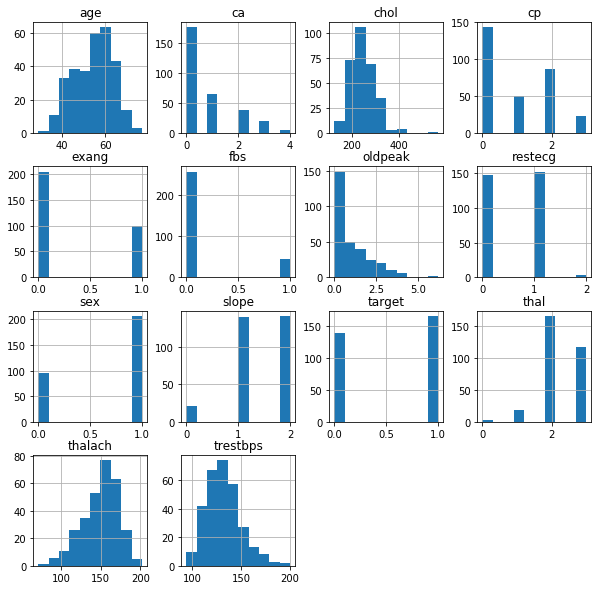

In [6]:
# create a histogram for all numeric variables 
heart_data.hist(figsize=(10,10));

In [7]:
heart_data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
heart_data.thal.unique()

array([1, 2, 3, 0])

<p><h3><font color=Blue> Creating Feature Matrix, Target Array and splitting into Train and Test Dataset</font></h3></p>

In [4]:
y = heart_data['target']
X = heart_data.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42,stratify=y)

In [5]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [11]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

<p><h3><font color = Blue> Finding baseline model </font></h3></p>

In [12]:
heart_data.target.value_counts()  

1    165
0    138
Name: target, dtype: int64

In [13]:
165/303

0.5445544554455446

<p><h3><font color=Blue> Building the Model </font></h3></p> 

In [6]:
# Building a model using all variables with max_depth = 4
hd_model = DecisionTreeClassifier(max_depth=4)

In [7]:
hd_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [8]:
from sklearn.tree import export_graphviz
from IPython.display import Image

In [9]:
export_graphviz(hd_model, out_file='clf_tree.dot',filled=False, rounded=True,special_characters=True,feature_names=X_train.columns)

In [10]:
! dot -Tpng clf_tree.dot -o clf_tree.png

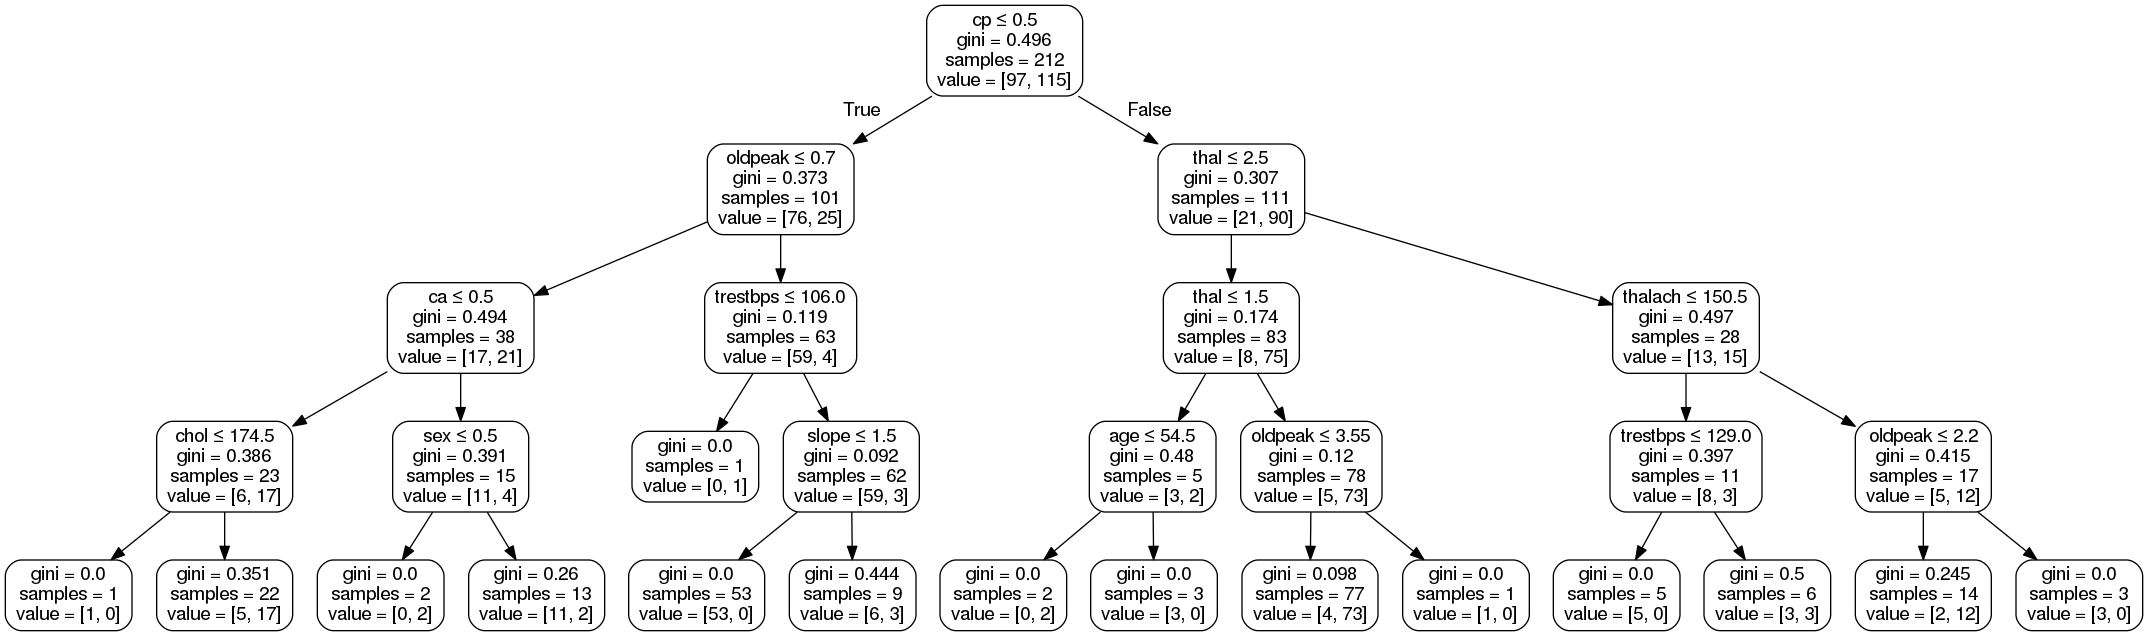

In [11]:
Image("clf_tree.png")

In [12]:
hd_model.score(X_train,y_train)   # accuracy score of the model

0.910377358490566

In [13]:
y_pred_train = hd_model.predict(X_train)

In [14]:
confusion_matrix(y_train, y_pred_train)    

array([[ 86,  11],
       [  8, 107]])

In [15]:
y_pred_test = hd_model.predict(X_test)     # predictions on test dataset 
y_pred_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1])

In [16]:
confusion_matrix(y_test,y_pred_test)

array([[28, 13],
       [ 9, 41]])

In [17]:
accuracy_score(y_test,y_pred_test)    # accuracy on test data

0.7582417582417582

In [26]:
sensitivity = 41/(41+9)
sensitivity

0.82

In [27]:
specificity = 28/(28+13)
specificity

0.6829268292682927

<p><h3><font color=Blue> Plotting ROC curve and Finding AUC </font></h3></p> 

In [18]:
pred_prob = hd_model.predict_proba(X_test)
pred_prob[:,1]

array([0.94805195, 0.77272727, 0.        , 0.77272727, 0.94805195,
       0.        , 0.94805195, 0.33333333, 1.        , 0.77272727,
       0.        , 0.77272727, 0.77272727, 0.        , 0.94805195,
       0.        , 0.85714286, 0.        , 0.94805195, 0.77272727,
       0.85714286, 0.94805195, 0.94805195, 0.94805195, 0.94805195,
       0.94805195, 0.        , 0.        , 0.94805195, 0.        ,
       0.15384615, 1.        , 0.94805195, 0.        , 0.5       ,
       0.85714286, 0.        , 0.        , 0.94805195, 0.77272727,
       0.94805195, 0.85714286, 0.        , 0.94805195, 0.        ,
       0.        , 0.33333333, 0.        , 0.15384615, 0.94805195,
       0.94805195, 0.33333333, 0.85714286, 0.94805195, 0.94805195,
       0.94805195, 0.15384615, 0.77272727, 0.5       , 0.94805195,
       0.        , 0.15384615, 0.94805195, 0.85714286, 0.        ,
       0.        , 0.94805195, 0.        , 1.        , 0.94805195,
       0.94805195, 0.15384615, 0.94805195, 0.94805195, 0.94805

In [19]:
fpr,tpr,t = roc_curve(y_test,pred_prob[:,1],pos_label=1)
print(fpr)
print(tpr)
print(t)

[0.         0.02439024 0.2195122  0.26829268 0.31707317 0.36585366
 0.43902439 0.58536585 1.        ]
[0.   0.04 0.6  0.68 0.82 0.82 0.84 0.84 1.  ]
[2.         1.         0.94805195 0.85714286 0.77272727 0.5
 0.33333333 0.15384615 0.        ]


In [32]:
t[0] = 1
print(t)

[1.         1.         0.94805195 0.85714286 0.77272727 0.5
 0.33333333 0.15384615 0.        ]


Text(0,0.5,'tpr')

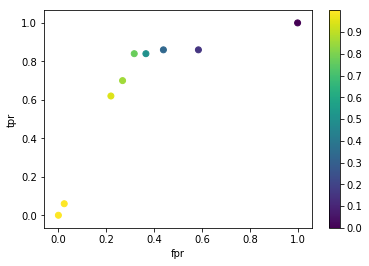

In [33]:
plt.scatter(fpr,tpr,c=t)
plt.colorbar(ticks=np.arange(0,1,0.1))
plt.xlabel('fpr')
plt.ylabel('tpr')

[[(0.0, 0.0), (0.024390243902439025, 0.06)], [(0.024390243902439025, 0.06), (0.21951219512195122, 0.62)], [(0.21951219512195122, 0.62), (0.2682926829268293, 0.7)], [(0.2682926829268293, 0.7), (0.3170731707317073, 0.84)], [(0.3170731707317073, 0.84), (0.36585365853658536, 0.84)], [(0.36585365853658536, 0.84), (0.43902439024390244, 0.86)], [(0.43902439024390244, 0.86), (0.5853658536585366, 0.86)], [(0.5853658536585366, 0.86), (1.0, 1.0)]]


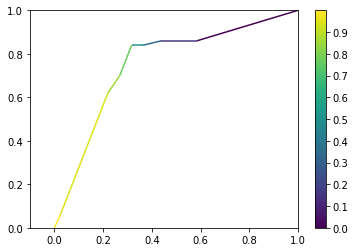

In [34]:
from matplotlib.collections import LineCollection
import matplotlib as mpl
l1 = []
for i in range(len(fpr)-1):
    l1.append([(fpr[i],tpr[i]),(fpr[i+1],tpr[i+1])])
print(l1)

lc = LineCollection(l1, cmap='viridis')
fig, ax = plt.subplots()
line=ax.add_collection(lc)
lc.set_array(t[1:])

plt.axis([-0.1,1,0,1])
plt.colorbar(line, ticks=np.arange(0,1,0.1))
plt.show()

In [20]:
auc(fpr,tpr)

0.7358536585365854

<p><h3><font color=Blue> Pruning the Model </font></h3></p> 

In [21]:
model1 = DecisionTreeClassifier(max_depth=4,random_state=100)

In [22]:
model1.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [23]:
parameters = {'max_depth': [1,2,3,4,5,6,7,8]}   # hyperparameter tuning

In [24]:
grid = GridSearchCV(hd_model,parameters,cv=10,return_train_score=False,scoring='accuracy')

In [25]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [26]:
grid.best_params_

{'max_depth': 3}

In [27]:
grid.best_score_

0.8018867924528302

In [28]:
model_prune=DecisionTreeClassifier(max_depth=3,random_state=42)

In [29]:
model_prune.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [30]:
model_prune.score(X_train,y_train)

0.8679245283018868

In [31]:
model_prune.feature_importances_

array([0.        , 0.        , 0.54469805, 0.02893084, 0.        ,
       0.        , 0.        , 0.04067801, 0.        , 0.18410161,
       0.        , 0.0657903 , 0.13580119])

In [32]:
data = pd.Series(data=model_prune.feature_importances_,index=X.columns)

In [33]:
data.sort_values(ascending=True,inplace=True)

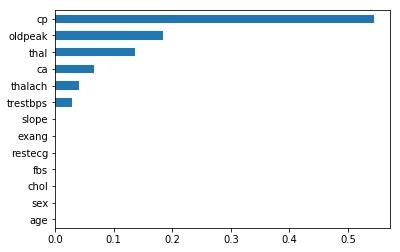

In [34]:
data.plot.barh()

In [35]:
pred_test = model_prune.predict(X_test)
pred_test

array([1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1])

In [36]:
confusion_matrix(y_test,pred_test)

array([[28, 13],
       [10, 40]])

In [37]:
accuracy_score(y_test,pred_test)

0.7472527472527473

In [49]:
print(classification_report(y_test,pred_test))

             precision    recall  f1-score   support

          0       0.74      0.68      0.71        41
          1       0.75      0.80      0.78        50

avg / total       0.75      0.75      0.75        91



In [51]:
sensitivity = 40/(40+10)
sensitivity

0.8

In [52]:
specificity = 28/(28+13)
specificity

0.6829268292682927